# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=Metric"
  
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bayanaul
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | aripuana
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | nyurba
Processing Record 7 of Set 1 | undurkhaan
Processing Record 8 of Set 1 | san patricio
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | luanco
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | dara
Processing Record 19 of Set 1 | susuman
Processing Record 20 of Set 1 | saipan
Processing Record 21 of Set 1 | isakogorka
City not found. Skipping...
Processing Record 22 of Set 1 | 'ohonua
City not fou

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bayanaul,50.7889,75.6956,6.95,55,16,2.15,KZ,1697202958
1,ushuaia,-54.8000,-68.3000,8.79,79,75,14.31,AR,1697202958
2,puerto natales,-51.7236,-72.4875,10.25,62,75,6.69,CL,1697202958
3,aripuana,-9.1667,-60.6333,33.99,42,16,0.73,BR,1697202958
4,lompoc,34.6391,-120.4579,18.21,100,20,3.09,US,1697202958


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bayanaul,50.7889,75.6956,6.95,55,16,2.15,KZ,1697202958
1,ushuaia,-54.8000,-68.3000,8.79,79,75,14.31,AR,1697202958
2,puerto natales,-51.7236,-72.4875,10.25,62,75,6.69,CL,1697202958
3,aripuana,-9.1667,-60.6333,33.99,42,16,0.73,BR,1697202958
4,lompoc,34.6391,-120.4579,18.21,100,20,3.09,US,1697202958


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

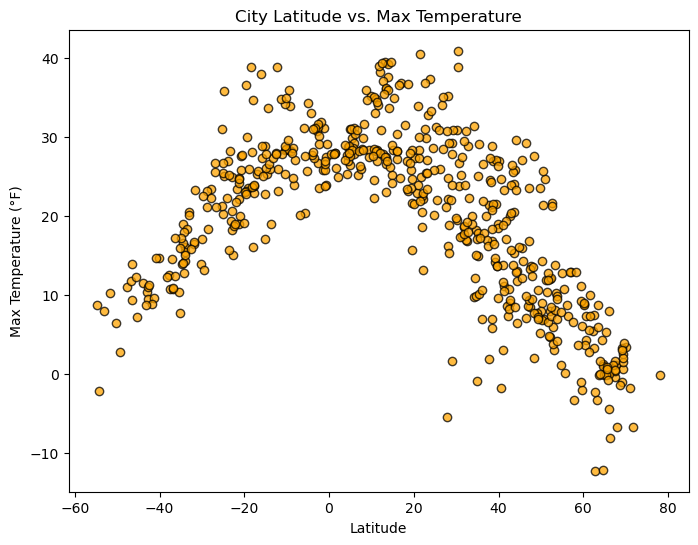

In [19]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color="orange", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

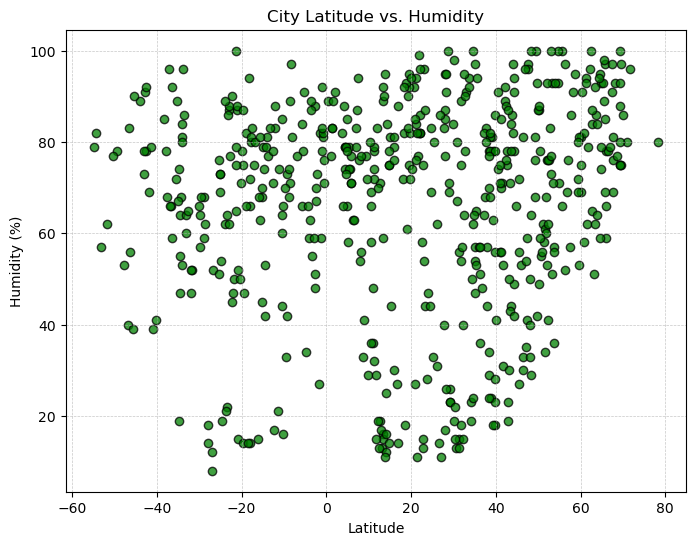

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color="green", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Save the figure../Resources/Fig2.png")
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

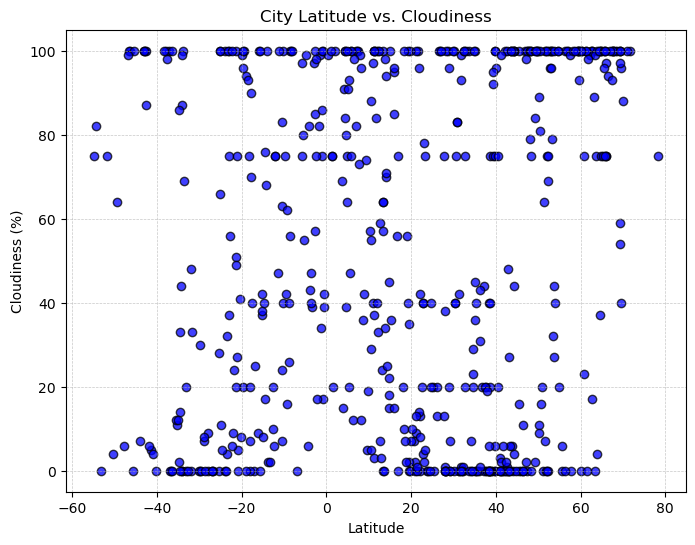

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

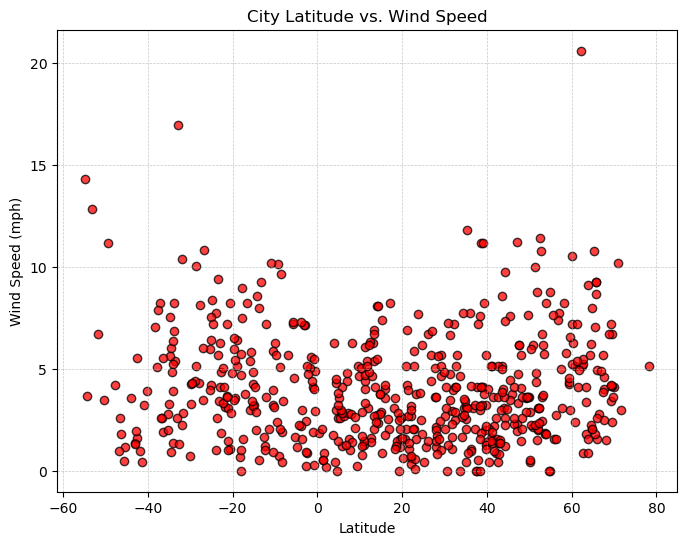

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="red", edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_coord, y_coord):
 
    plt.scatter(x_values,y_values)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.plot(x_values,regress_values,color="Red")    
    # Create regression line equation
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.annotate(line_eq,(x_coord,y_coord),color="red",fontsize = 15)
    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bayanaul,50.7889,75.6956,6.95,55,16,2.15,KZ,1697202958
4,lompoc,34.6391,-120.4579,18.21,100,20,3.09,US,1697202958
5,nyurba,63.2842,118.3319,-3.27,51,89,1.79,RU,1697202959
6,undurkhaan,47.3194,110.6556,8.48,41,0,3.33,MN,1697202959
7,san patricio,28.0170,-97.5169,24.90,95,1,2.13,US,1697202959


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,8.79,79,75,14.31,AR,1697202958
2,puerto natales,-51.7236,-72.4875,10.25,62,75,6.69,CL,1697202958
3,aripuana,-9.1667,-60.6333,33.99,42,16,0.73,BR,1697202958
9,waitangi,-43.9535,-176.5597,11.57,89,7,3.58,NZ,1697202960
11,bredasdorp,-34.5322,20.0403,18.99,55,14,6.00,ZA,1697202960


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6851764103980241


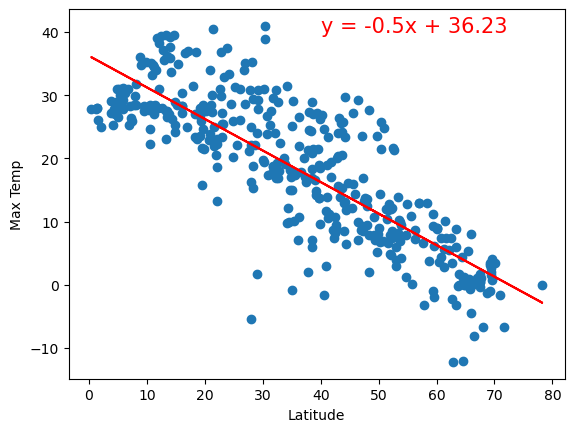

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 40, 40)

The r-value is: 0.6693494126605996


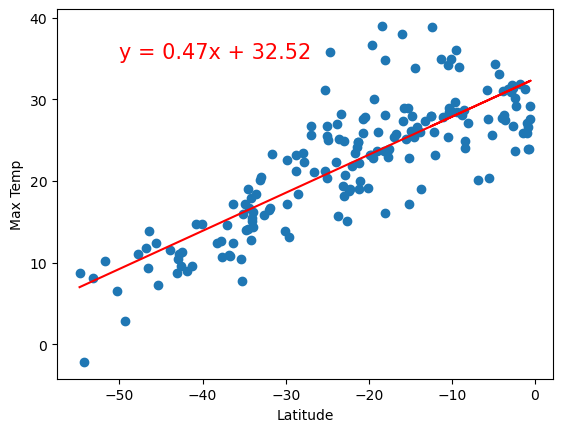

In [37]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, -50, 35)

**Discussion about the linear relationship:** 

The linear relationship between latitude and max temperature is strong. The above graphs indicate the closer to the equator, the higher the temperatures are. This works for both Northern and Southern Hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.037787719951742994


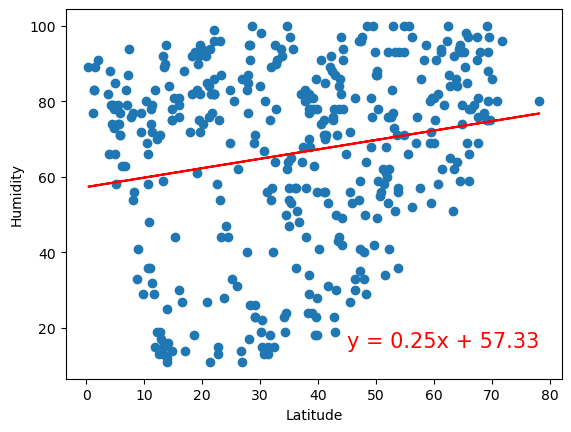

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, 45, 15)

The r-value is: 4.9354338103967406e-05


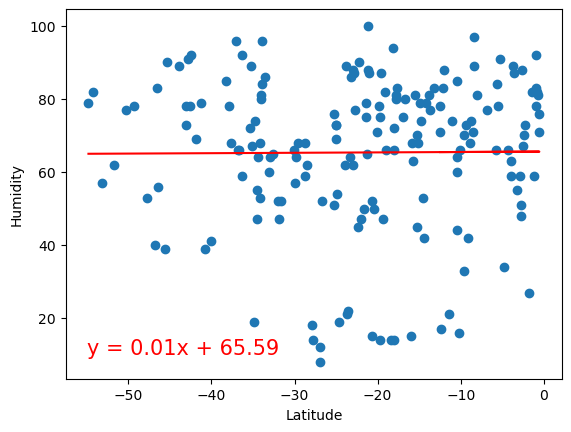

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, -55, 10)

**Discussion about the linear relationship:** 
The linear relationship between latitude and humidity is weak, almost non existant. The above graphs indicate there is little to no relationship between the latitude and the humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0303309165249943


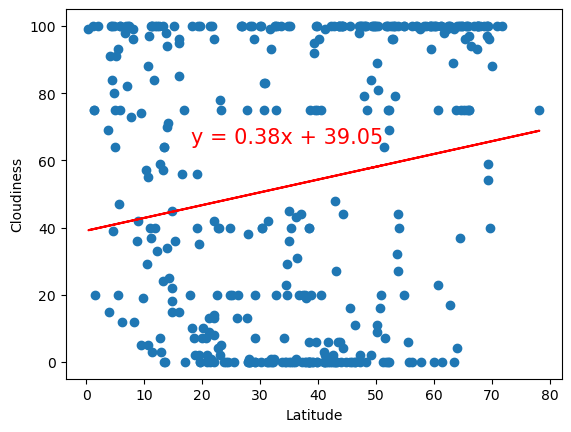

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, 18, 65)

The r-value is: 0.016228208176106672


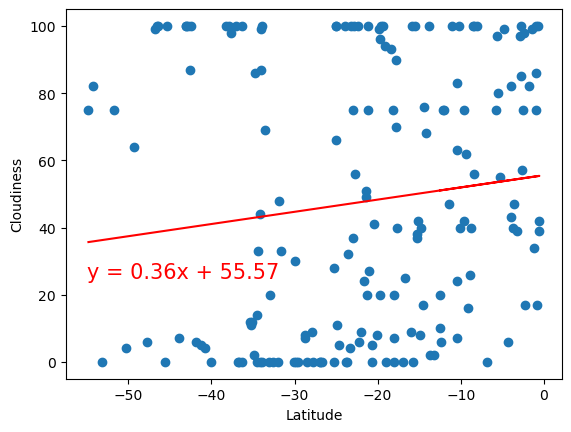

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, -55, 25)

**Discussion about the linear relationship:** 
The linear relationship between latitude and cloudiness is weak. The above graphs indicate there is very little relationship between the latitude and the cloudiness present. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06577209758956205


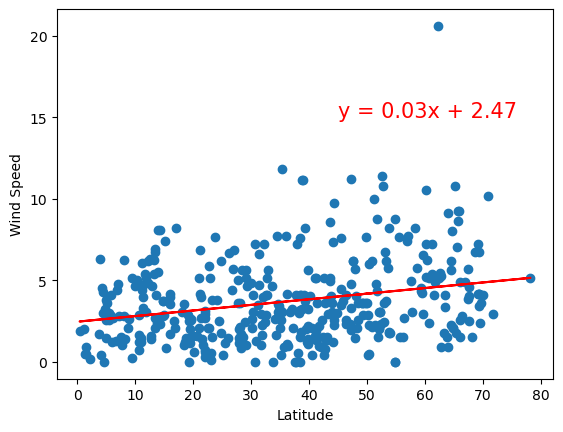

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, 45, 15)

The r-value is: 0.011622865057810676


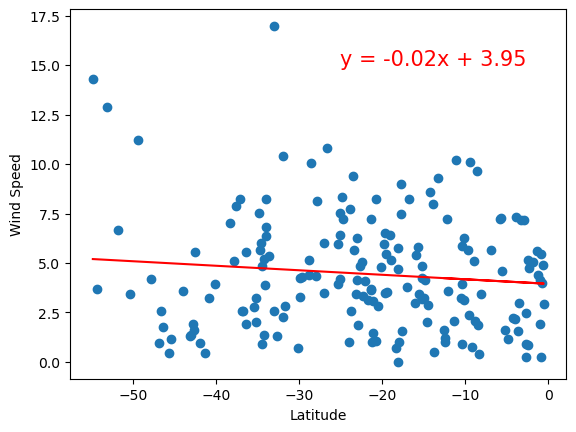

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, -25, 15)

**Discussion about the linear relationship:** 
The linear relationship between latitude and wind speed is also weak. The above graphs indicate there is very little relationship between the latitude and the windspeed present. 